In [1]:
pwd

'/home/piai/PABA_27/BigData/project'

### 1. 데이터 불러오기 

In [2]:
import time 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib

## 최종 데이터셋 만들기

In [ ]:
# 원본 데이터 불러오기 
df = pd.read_csv("/home/piai/다운로드/01 실습파일/2. Big Data 분석/Car.csv",encoding="euc-kr")

In [ ]:
# 데이터 확인
df.head()

In [ ]:
# 데이터 형태 파악
df.shape

In [ ]:
- 7253개의 행과 13개의 열로 구성

In [ ]:
# 단위 분리 및 단위 제거, 데이터 확인 결과 해당 컬럼값에 단위가 존재 -> 제거가 필요함
df['Mileage'] = df['Mileage'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 1 else x)
df['Engine'] = df['Engine'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 1 else x)
df['Power'] = df['Power'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 1 else x)
df['New_Price'] = df['New_Price'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 1 else x)

In [ ]:
# 단위 분리 및 제거 확인
df.head()

In [ ]:
# Brand 열 추가
df['Brand'] = df['Name'].apply(lambda x : x.split()[0])

In [ ]:
# Model 열 추가
df['Model'] = df['Name'].apply(lambda x : x.split()[1:])
df['Model'] = df['Name'].apply(lambda x: ' '.join(x.split()[1:]))

In [ ]:
# Age 열 추가(현 시점 기준으로 차량 연식 확인)
current_year = 2024
df['Age'] = current_year - df['Year']

In [ ]:
# 브랜드와 나라 매핑 딕셔너리 생성
brand_country_mapping = {
    'Maruti': 'India',
    'Hyundai': 'South Korea',
    'Honda': 'Japan',
    'Toyota': 'Japan',
    'Mercedes-Benz': 'Germany',
    'Volkswagen': 'Germany',
    'Ford': 'USA',
    'Mahindra': 'India',
    'BMW': 'Germany',
    'Audi': 'Germany',
    'Tata': 'India',
    'Skoda': 'Czech Republic',
    'Renault': 'France',
    'Chevrolet': 'USA',
    'Nissan': 'Japan',
    'Land': 'UK',
    'Jaguar': 'UK',
    'Fiat': 'Italy',
    'Mitsubishi': 'Japan',
    'Mini': 'UK',
    'Volvo': 'Sweden',
    'Porsche': 'Germany',
    'Jeep': 'USA',
    'Datsun': 'Japan',
    'ISUZU': 'Japan',
    'Force': 'India',
    'Bentley': 'UK',
    'Smart': 'Germany',
    'Ambassador': 'India',
    'Lamborghini': 'Italy',
    'Hindustan': 'India',
    'OpelCorsa': 'Germany'
}

In [ ]:
# 나라별 파생 변수 생성
df['Country'] = df['Brand'].map(brand_country_mapping)

In [ ]:
# 파생 변수 결과 확인
df.info()

In [ ]:
# 결측값, 이상치 채우기
df.loc[df['Model'] == '5 Series 520d Sedan', ['Engine', 'Power','Mileage' ,'Seats']] = [1995, 184,18.48, 5.0]
df.loc[df['Model'] == 'CR-V AT With Sun Roof', ['Engine', 'Power','Mileage' ,'Seats']] = [2354, 190,10.7, 5.0]
df.loc[df['Model'] == 'City 1.3 DX', ['Engine', 'Power','Mileage' ,'Seats']] = [1498, 119.35,17.8, 5.0]
df.loc[df['Model'] == 'Etios Liva Diesel TRD Sportivo', ['Engine', 'Power','Mileage' ,'Seats']] = [1364, 68,23.59, 5.0]
df.loc[df['Model'] == 'Jazz Select Edition', ['Engine', 'Power','Mileage' ,'Seats']] = [1198, 90,12.4, 5.0]
df.loc[df['Model'] == 'Laura 1.8 TSI Ambition', ['Engine', 'Power','Mileage' ,'Seats']] = [1798, 158,14.6, 5.0]
df.loc[df['Model'] == 'Punto 1.2 Dynamic', ['Engine', 'Power','Mileage' ,'Seats']] = [1172, 67,15.8, 5.0]
df.loc[df['Model'] == 'Punto 1.3 Emotion', ['Engine', 'Power','Mileage' ,'Seats']] = [1248, 75,20.5, 5.0]
df.loc[df['Model'] == 'Punto 1.4 Emotion', ['Engine', 'Power','Mileage' ,'Seats']] = [1368, 90,10.8, 5.0]
df.loc[df['Model'] == 'Rover Range Rover 3.0 D', ['Engine', 'Power','Mileage' ,'Seats']] = [3000, 130,23.56, 5.0]
df.loc[df['Model'] == 'Rover Range Rover Sport 2005 2012 Sport', ['Engine', 'Power','Mileage' ,'Seats']] = [4196, 390,15, 5.0]
df.loc[df['Model'] == 'Santro GLS II - Euro II', ['Engine', 'Power','Mileage' ,'Seats']] = [999, 69,20.3, 5.0]
df.loc[df['Model'] == 'Santro LP zipPlus', ['Engine', 'Power','Mileage' ,'Seats']] = [999, 62,12.8, 5.0]
df.loc[df['Model'] == 'Santro Xing XG', ['Engine', 'Power','Mileage' ,'Seats']] = [1086, 63,12.8, 5.0]
df.loc[df['Model'] == 'Swift 1.3 LXI', ['Engine', 'Power','Mileage' ,'Seats']] = [1197, 85,18.6, 5.0]
df.loc[df['Model'] == 'Swift 1.3 VXI ABS', ['Engine', 'Power','Mileage' ,'Seats']] = [1298, 85.8,12.36, 5.0]
df.loc[df['Model'] == 'Swift 1.3 VXi', ['Engine', 'Power','Mileage' ,'Seats']] = [1197, 80.6,24.8, 5.0]
df.loc[df['Model'] == 'Swift 1.3 ZXI', ['Engine', 'Power','Mileage' ,'Seats']] = [1197, 83,20.4, 5.0]
df.loc[df['Model'] == 'TUV 300 P4', ['Engine', 'Power','Mileage' ,'Seats']] = [1493, 100,18.49, 5.0]
df.loc[df['Model'] == 'Wagon R Vx', ['Engine', 'Power','Mileage' ,'Seats']] = [998, 55.92,23.56, 5.0]
df.loc[df['Model'] == 'i20 new Sportz AT 1.4', ['Engine', 'Power','Mileage' ,'Seats']] = [1197, 82,16, 5.0]
df.loc[df['Model'] == 'City 1.5 GXI', ['Engine', 'Power','Mileage' ,'Seats']] = [1493, 100,12.8, 5.0]
df.loc[df['Model'] == 'Etios Liva V', ['Engine', 'Power','Mileage' ,'Seats']] = [1197, 80,18.16, 5.0]
df.loc[df['Model'] == 'Figo Diesel', ['Seats']] = [5.0]
df.loc[df['Model'] == 'City 1.5 EXI', ['Seats']] = [5.0]
df.loc[df['Model'] == 'Estilo LXI', ['Seats']] = [5.0]
df.loc[df['Model'] == 'Endeavour Hurricane LE', ['Seats']] = [7.0]
df.loc[df['Model'] == 'Estilo LXI', ['Seats']] = [5.0]
df.loc[df['Model'] == 'Jazz 2020 Petrol', ['Seats']] = [5.0]
df.loc[df['Model'] == 'E Verito D4', ['Mileage']] = [142.0]
df.loc[df['Model'] == 'Prius 2009-2016 Z4', ['Mileage']] = [23.91]

- 원본 데이터 분석 결과, https://www.carwale.com/bmw-cars/5-series-2013-2017/520d-luxury-line/ 해당 링크의 데이터와 일치함을 발견하였습니다.
- 따라서 원본 데이터 특성을 살리기 위해 결측치, 이상치를 해당 링크 데이터 기반으로 처리하였습니다.

In [ ]:
# power의 이상치값을 drop함
df['Power'] = pd.to_numeric(df['Power'], errors = 'coerce')
df['Power'] = df['Power'].astype(float)
df=df.dropna(subset=['Power'])
df=df.reset_index(drop=True)

- power의 경우 price에 중요한 요인으로 판단하여 결측치를 처리에 문제가 발생했습니다.
- 하지만, 결측치의 수가 전체 데이터의 수 대비 약 1%로 영향력이 적다고 판단하여 drop하기로 결정하였습니다.
- drop으로 인해 index값을 재설정해주었습니다.

In [ ]:
# power의 데이터 타입 확인
df.info()

In [ ]:
# New_Price의 결측치를 0으로 대체
df['New_Price'] = df['New_Price'].fillna(0)
# Price 칼럼에서 NaN 값을 가진 행 삭제
df = df.dropna(subset=['Price'])

In [ ]:
# 최종 결측치, 이상치 처리 확인 (7253, 13) -> (7124, 17)
df.shape

# 분포 확인하기

In [ ]:
from datetime import datetime
def save_chart_as_jpg(plt, folder_name, file_name_prefix):
    # '최종본 1' 폴더 경로 설정
    save_dir = '/home/piai/최종본jpg'
    # 폴더가 없으면 생성
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # 현재 시간 문자열 생성
    current_time = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    # 이미지 파일 경로 설정 (시간을 포함하여 파일명 고유화)
    save_path = os.path.join(save_dir, f"{file_name_prefix}_{current_time}.jpg")
    
    # 이미지 저장
    plt.savefig(save_path, format='jpg')

### Name (Brand+ Model)

In [ ]:
# 브랜드 Top 10
brand_top10 = pd.DataFrame(df['Brand'].value_counts().head(10))
# brand_top10

plt.figure(figsize=(10,5))
sns.barplot(x=brand_top10['Brand'], y=brand_top10.index, palette='coolwarm')
plt.title('Top 10 Brands')
plt.show()

- Maruti, Hyundai, Honda가 제일 많다. 

In [ ]:
# 브랜드별 가격 분포
plt.figure(figsize=(10,5))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Brand Price Distribution')
plt.show()

### Year, Age

In [ ]:
# 연도별 분포 
# 중고차 거래가 가장 활발한 연도 (거래량)
year = df.groupby(by='Year').size().sort_values(ascending=False)
# year

plt.figure(figsize=(10,5))
sns.barplot(x=year.index, y=year, palette='coolwarm')
plt.title('Year Distribution')
plt.show()

- 2015~2017년에 제일 거래량이 많았다. 

In [ ]:
# 자동차의 연식 분포
age = df['Age'].value_counts().sort_index()
# age

plt.figure(figsize=(10,5))
sns.barplot(x=age.index, y=age, palette='coolwarm')
plt.title('Age Distribution')
plt.show()

- 8~10년 정도 된 차량이 가장 많다.

### Location

In [ ]:
# 지역별 분포 
location = df.groupby(by='Location').size().sort_values(ascending=False)
# location

plt.figure(figsize=(10,5))
sns.barplot(x=location.index, y=location, palette='coolwarm')
plt.title('Location Distribution')
plt.show()

- Mumbai, Hyderabad, Kochi, Coimbatore

In [ ]:
# 지역별 가격표 
location_price = df.groupby(by='Location')['Price'].mean().sort_values(ascending=False)
# location

plt.figure(figsize=(10,5))
sns.barplot(x=location_price.index, y=location_price, palette='coolwarm')
plt.title('Location Price Distribution')
plt.show()

### Transmission

In [ ]:
# 변속기 타입 분포 
transmission = df['Transmission'].value_counts()
# transmission

plt.figure(figsize=(10,5))
sns.barplot(x=transmission.index, y=transmission, palette='coolwarm')
plt.title('Transmission Distribution')
plt.show()

In [ ]:
# 변속기 타입 별 가격 분포 
plt.figure(figsize=(10,5))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Transmission Price Distribution')
plt.show()

- Automatic보다 Manual의 차량이 더 많지만, 가격은 Automatic이 더 높다.

### Owner Type

In [ ]:
# 소유자 수 분포
owner = df['Owner_Type'].value_counts()
# owner

plt.figure(figsize=(10,5))
sns.barplot(x=owner.index, y=owner, palette='coolwarm')
plt.title('Owner Distribution')
plt.show()

In [ ]:
# 소유자 수 별 가격 분포
plt.figure(figsize=(10,5))
sns.boxplot(x='Owner_Type', y='Price', data=df)
plt.title('Owner Price Distribution')
plt.show()

### Fuel Type

In [ ]:
# 연료 타입 분포
fuel = df['Fuel_Type'].value_counts()
# fuel

plt.figure(figsize=(10,5))
sns.barplot(x=fuel.index, y=fuel, palette='coolwarm')
plt.title('Fuel Distribution')
plt.show()

In [ ]:
# 연료 타입 별 가격 분포
plt.figure(figsize=(10,5))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Fuel Price Distribution')
plt.show()

## 최종 데이터셋 불러오기

In [1]:
# 최종 데이터셋 불러오기 
df = pd.read_csv('./Car_final.csv')
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.info()

### 2. 데이터 전처리 

#### 2-1. 영향인자 순위 기반 feature 선택

영향인자 순위:    
1 **NAME**    
2 **YEAR**   
3 **Kilometers_Driven**   
4 **Fuel_Type**   
5 **Transmisssion**   
6  **Seats**    
7 **Owner**   

- 모델 학습에 중요한 영향을 미칠 수 있는 feature만을 선택한다. 
- 모델의 복잡성을 줄이고, 중요한 변수에 집중하여 목표변수에 직접적으로 영향을 끼치는 변수들을 이용하여 성능을 향상시키고자 하였다.

In [5]:
# 필요한 열만 선택 (영향인자 순위 기반)
features = ['Brand', 'Model', 'Age', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Seats', 'Owner_Type']
df_X = df[features]
df_y = df['Price']

#### 2-2. 범주형 변수 인코딩 및 숫자형 변수 변환 

- 범주형(categorical) 변수와 숫자형(numerical) 변수를 분리하여 각각 적절한 전처리를 적용한다. 
- 범주형 변수와 모델이 처리할 수 있는 숫자 형식으로 인코딩한다. 
    - 인코딩 방식에는 라벨 인코딩(Label Encoding)과 원핫 인코딩(One-Hot Encoding)이 있다. 
      라벨 인코딩은 숫자값으로 변환되어 순서가 반영되어 독립적인 관축값간의 관계성이 생긴다. 
      원핫 인코딩은 개별적으로 해당 컬럼에 속하는 값만 1, 그 외 값은 모두 0을 갖는다. 현재 데이터에서는 원핫인코딩을 적용하였다. 
- 숫자형 변수는 그대로 모델에 전달한다. 

In [6]:
# 범주형 변수 인코딩 및 숫자형 변수 변환
# 범주형 변수 
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
# 숫자형 변수
numerical_features = ['Age', 'Kilometers_Driven', 'Seats']

# 전처리
preprocessor = ColumnTransformer(
    transformers=[
        # 범주형 변수 one-hot encoding
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        # 숫자형 변수는 그대로
        ('num', 'passthrough', numerical_features)])

#### 2-3. 추가 전처리 방법

- 로그 변환 적용    
    - 데이터의 분포를 정규화하여 모델이 더 안정적으로 학습할 수 있도록 돕는다. 정규성을 높이고 분석에서 정확한 값을 얻기 위해 사용한다. 
    - 가격(Price)과 주행거리(Kilometers_Driven) 변수에 로그 변환을 적용하여 큰 값들의 영향을 줄인다. 
- 상호작용 변수 생성    
    - 특정 변수들의 조합이 목표 변수에 미치는 영향을 더 잘 포착할 수 있도록 할 수 있다. 
    - 연료 유형(Fuel_Type)과 변속기 유형(Transmission), 브랜드(Brand)와 모델(Model)의 상호작용 변수를 생성하여 이들의 조합이 모델에 미치는 영향을 더 잘 반영할 수 있도록 한다. 
- 다항식 변수 적용 (실제 적용 X)   
    - 모든 수치형 변수에 대한 2차 다항식 feature를 생성하여 비선형성을 모델에 반영할 수 있도록 한다. 
    - 다만, 실제 적용에서는 오버피팅을 방지하기 위해 적용하지 않는다. 
- 표준화 (실제 적용 X)   
    - 모든 수치형 변수에 대해 표준화를 적용하여 각 변수의 범위를 일정하게 맞추고, 모델이 특정 변수에 지나치게 의존하지 않도록 한다. 
    - 실제로는 선형 회귀 이외의 모델에서는 표준화를 적용하지 않는다. 

- 각각의 전처리 코드를 True/False로 적용 여부를 결정할 수 있도록 하였다. 

In [7]:
# 추가적인 전처리 
# (True/False로 적용 여부를 결정)
apply_log_transform = True
apply_fuel_transmission_interaction_terms = True
apply_brand_model_interaction = True
# apply_polynomial_features = False
# apply_standardization = False

# 로그 변환 적용 
# (Price, Kilometers_Driven)에 로그 변환 적용
if apply_log_transform:
    df_y = np.log1p(df_y)
    df_X['Kilometers_Driven'] = np.log1p(df_X['Kilometers_Driven'])
    print("apply log transform")

# 상호작용 변수 생성 
# (Fuel_Type, Transmission)에 대한 상호작용 변수 생성
if apply_fuel_transmission_interaction_terms:
    # 두 변수의 값을 문자열로 변환하고, 결합하여 새로운 변수 생성
    # (ex. Diesel_Manual, Petrol_Automatic)
    df_X['Fuel_Transmission'] = df_X['Fuel_Type'].astype(str) + '_' + df_X['Transmission'].astype(str)
    # 새로운 변수를 범주형 변수로 추가 
    # (기존의 Fuel_Type, Transmission 변수는 제거)
    categorical_features.append('Fuel_Transmission')
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
            ('num', 'passthrough', numerical_features)])
    print("apply fuel_type + transmission interaction terms")

# (Brand, Model)에 대한 상호작용 변수 생성
if apply_brand_model_interaction:
    df_X['Brand_Model'] = df_X['Brand'].astype(str) + '_' + df_X['Model'].astype(str)
    categorical_features.append('Brand_Model')
    print("apply brand + model interaction terms")

# # 5. 다항식 피처 생성 (실제 적용 X)
# # (모든 수치형 변수)에 대한 2차 다항식 피처 생성
# if apply_polynomial_features:
#     poly_features = PolynomialFeatures(degree=2, include_bias=False)
#     preprocessor = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('poly', poly_features)
#     ])
#     print("apply polynomial features")

# # 6. 표준화 적용 (실제 적용 X)
# # (모든 수치형 변수)에 대한 표준화 적용
# 선형회귀를 제외한 나머지 회귀 모델은 표준화를 적용하지 않음 
# if apply_standardization:
#     preprocessor = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('scaler', StandardScaler(with_mean=False))
#     ])
#     print("apply standardization")

apply log transform
apply fuel_type + transmission interaction terms
apply brand + model interaction terms


#### 2-4. 데이터 Train/Test 분할

- 학습 데이터와 테스트 데이터를 8:2로 분리하여 모델의 성능을 검증할 수 있도록 한다. 

In [8]:
# 데이터 분할
df_X = preprocessor.fit_transform(df_X)
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2024)

In [9]:
# preprocessing 저장
# 추후 예측 시, 동일한 전처리 과정을 거쳐야 함
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [10]:
df_X_train.shape, df_X_test.shape

((5698, 4030), (1425, 4030))

### 3. 모델 학습 및 평가 

- 다양한 회귀 모델을 정의하고, 각 모델을 학습시킨 후 성능을 평가한다.   
사용된 모델:   
**(1) Decision Tree**  
**(2) Random Forest**  
**(3) Gradient Boosting**  
**(4) XGBoost**    
**(5) LightGBM**   

In [11]:
# 8. 모델 정의 및 학습
# DecisionTreeRegressor, RandomForest, GradientBoosting, XGBoost, LightGBM
models = {
    # 'LinerRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=2024),
    'RandomForest': RandomForestRegressor(random_state=2024),
    'GradientBoosting': GradientBoostingRegressor(random_state=2024),
    'XGBoost': XGBRegressor(random_state=2024),
    'LightGBM': LGBMRegressor(random_state=2024)
}

- 입력된 모델을 사용해 학습하고, 테스트 데이터로 평가한 결과를 출력한다. 
- MSE(Mean Squared Error), RMSE(Root Mean Squared Error), MAE(Mean Absolute Error), R^2 (결정 계수)를 계산하여 모델의 성능을 평가한다. 

Training DecisionTree took 0.60 seconds.
Model 'DecisionTree' has been saved as 'DecisionTree_model.pkl'.
### DecisionTree Model Evaluation ###
MSE: 0.1374
RMSE: 0.3707
MAE: 0.2447
R^2: 0.8106


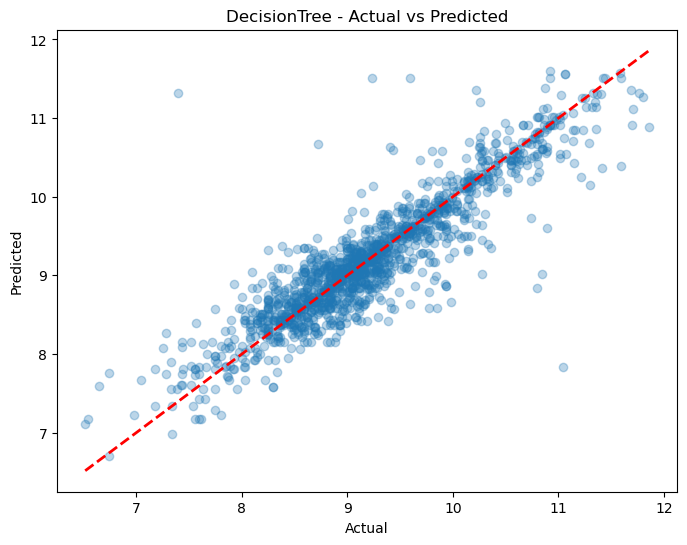

Evaluation for DecisionTree took 0.31 seconds.
----------------------------------------------------------------------------------
Training RandomForest took 37.26 seconds.
Model 'RandomForest' has been saved as 'RandomForest_model.pkl'.
### RandomForest Model Evaluation ###
MSE: 0.1031
RMSE: 0.3210
MAE: 0.2091
R^2: 0.8579


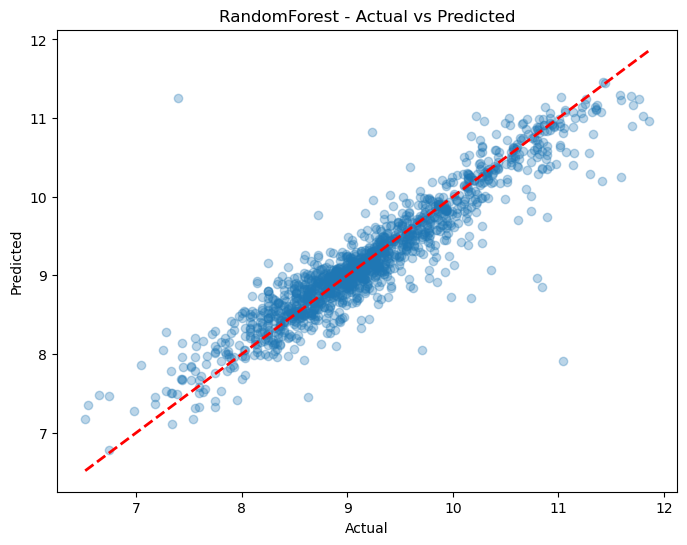

Evaluation for RandomForest took 0.26 seconds.
----------------------------------------------------------------------------------
Training GradientBoosting took 2.86 seconds.
Model 'GradientBoosting' has been saved as 'GradientBoosting_model.pkl'.
### GradientBoosting Model Evaluation ###
MSE: 0.1417
RMSE: 0.3765
MAE: 0.2765
R^2: 0.8046


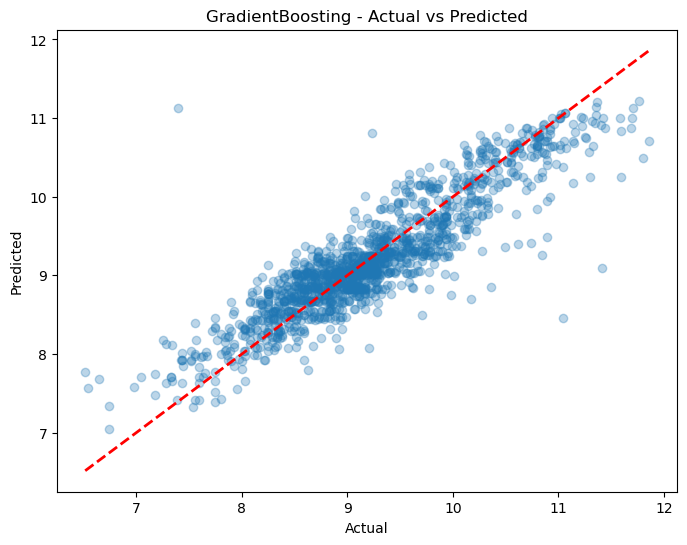

Evaluation for GradientBoosting took 0.21 seconds.
----------------------------------------------------------------------------------
Training XGBoost took 0.79 seconds.
Model 'XGBoost' has been saved as 'XGBoost_model.pkl'.
### XGBoost Model Evaluation ###
MSE: 0.1032
RMSE: 0.3213
MAE: 0.2236
R^2: 0.8577


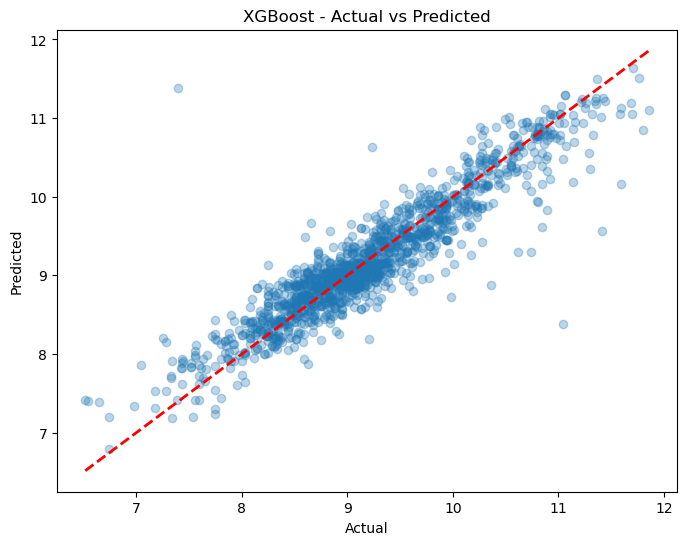

Evaluation for XGBoost took 0.24 seconds.
----------------------------------------------------------------------------------
Training LightGBM took 0.85 seconds.
Model 'LightGBM' has been saved as 'LightGBM_model.pkl'.
### LightGBM Model Evaluation ###
MSE: 0.1320
RMSE: 0.3633
MAE: 0.2564
R^2: 0.8180


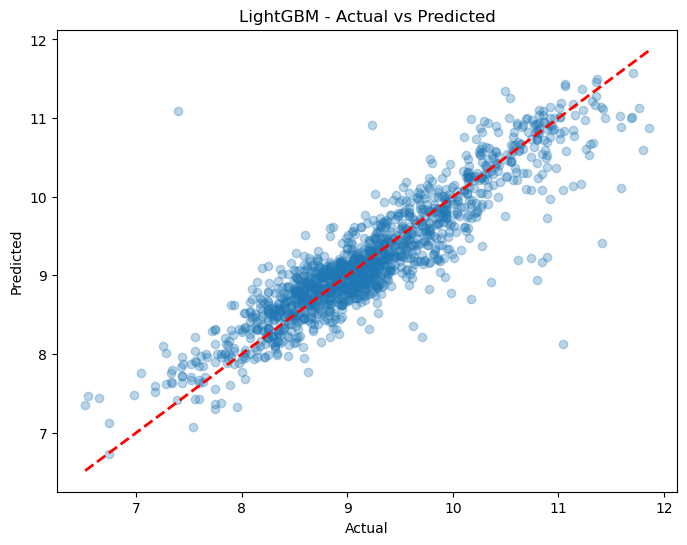

Evaluation for LightGBM took 0.24 seconds.
----------------------------------------------------------------------------------


In [12]:
# 모델 학습 및 평가 함수
def evaluate_model(name, model, df_X_test, df_y_test):
    start_time = time.time() # 모델 평가 시작 시간 기록 
    
    # 테스트 데이터에 대한 예측 수행 
    df_y_pred = model.predict(df_X_test)
    
    # 성능 지표 계산
    mse = mean_squared_error(df_y_test, df_y_pred) # MSE: 평균 제곱 오차
    rmse = np.sqrt(mse) # RMSE: 평균 제곱근 오차
    mae = mean_absolute_error(df_y_test, df_y_pred) # MAE: 평균 절대 오차
    r2 = r2_score(df_y_test, df_y_pred) # R^2: 결정 계수
    
    # 평가 결과 출력 
    print(f'### {name} Model Evaluation ###')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R^2: {r2:.4f}')
    
    # 예측 결과 시각화
    plt.figure(figsize=(8, 6))
    plt.scatter(df_y_test, df_y_pred, alpha=0.3) # 실제값과 예측값의 분포 (산점도)
    plt.plot([df_y_test.min(), df_y_test.max()], [df_y_test.min(), df_y_test.max()], 'r--', lw=2) # y=x선 (완벽한 예측일 경우)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()
    
    # 모델 평가 소요 시간 출력
    print(f"Evaluation for {name} took {time.time() - start_time:.2f} seconds.")
    print('----------------------------------------------------------------------------------')

# 모델별 학습, 저장, 평가 실행
# 모델을 순차적으로 학습시키고, 학습된 모델을 저장한 후 평가
for name, model in models.items():
    start_time = time.time() # 모델 학습 시작 시간 기록
    
    # 모델 학습
    model.fit(df_X_train, df_y_train)
    print(f"Training {name} took {time.time() - start_time:.2f} seconds.") # 학습 소요 시간 출력
    
    # 학습된 모델을 파일로 저장 
    model_filename = f'{name}_model.pkl'
    joblib.dump(model, model_filename)
    
    # 저장 완료 메시지 출력
    print(f"Model '{name}' has been saved as '{model_filename}'.")

    # 모델 평가
    evaluate_model(name, model, df_X_test, df_y_test)

- 그래프 해석 방법 
    - 파란색 점: 예측 결과와 실제 값의 쌍 
    - 빨간색 점선: y=x(예측 결과 = 실제 쌍)를 나타내는 선 
        -> 모델이 완벽하게 예측했다면 모든 점들이 이 선위에 위치해야한다. 
- R^2(결정계수)
    - Random Forest: 0.8579
    - XGBoost: 0.8577
    - Gradient Boosting: 0.8577
    - Decision Tree: 0.8106
    - Random Forest와 XGBoost가 상대적으로 높은 결정계수(설명력)을 띤다. 

### 4. 모델 시각화 

- ColumnTransformer에서 원핫 인코딩된 열 이름 추출한다. 
    - 전처리 과정에서 범주형 변수에 대해 원핫 인코딩이 적용되므로 원핫 인코딩된 결과의 새로운 열 이름을 추출한다. 
    - 이 단계는 원핫 인코딩된 변수의 각 범주가 어떻게 변환되었는지를 이해하고, 나중에 분석하거나 디버깅할 때 해당 열이 무엇을 나타내는지를 명확히 알 수 있다.
- 원핫 인코딩된 열 이름과 숫자형 변수의 열 이름을 결합하여 전체 열 이름 리스트 생성한다.  
    - 최종 데이터프레임에 포함될 모든 열의 이름을 포함하는 리스트를 생성한다.
    - 이 리스트는 원핫 인코딩된 범주형 변수의 새로운 열 이름과 기존의 숫자형 변수 이름을 포함한다. 
- CSR matrix를 DataFrame으로 변환 
    - ColumnTransformer는 데이터 변환 후 CSR(Compressed Sparse Row) 형식의 희소 행렬로 결과를 반환한다. 
    - CSR 형식은 메모리 효율적이지만, 분석이나 모델 학습에서 사용하기 위해서는 DataFrame으로 변환이 필요한다. 
    - 이를 통해 각 열의 이름을 명확히 지정하고, DataFrame으로 변환하여 추후 작업에서 쉽게 다를 수 있다. 

In [14]:
# ColumnTransformer에서 원-핫 인코딩된 열 이름 추출
# 전처리 과정에서 범주형 변수에 대해 원핫 인코딩이 적용되었으므로 결과의 새로운 열 이름을 추출 
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# 모든 열 이름을 결합
all_columns = list(onehot_columns) + numerical_features

# CSR matrix를 DataFrame으로 변환
# CSR matrix 형태인 X_train, X_test를 DataFrame으로 변환
df_X_train = pd.DataFrame(df_X_train.toarray(), columns=all_columns)
df_X_test = pd.DataFrame(df_X_test.toarray(), columns=all_columns)

In [15]:
df_X_train.head()

,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,...,Brand_Model_Volvo_V40 D3 R Design,Brand_Model_Volvo_XC60 D4 SUMMUM,Brand_Model_Volvo_XC60 D4 Summum,Brand_Model_Volvo_XC60 D5,Brand_Model_Volvo_XC60 D5 Inscription,Brand_Model_Volvo_XC90 2007-2015 D5 AT AWD,Brand_Model_Volvo_XC90 2007-2015 D5 AWD,Age,Kilometers_Driven,Seats
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.967129,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.050876,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.476950,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,10.303370,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,10.645449,5.0


In [16]:
print(df_X_train.info())
print(df_X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698 entries, 0 to 5697
Columns: 4030 entries, Brand_Ambassador to Seats
dtypes: float64(4030)
memory usage: 175.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Columns: 4030 entries, Brand_Ambassador to Seats
dtypes: float64(4030)
memory usage: 43.8 MB
None


#### 4-1. 모델별 변수 중요도 시각화 

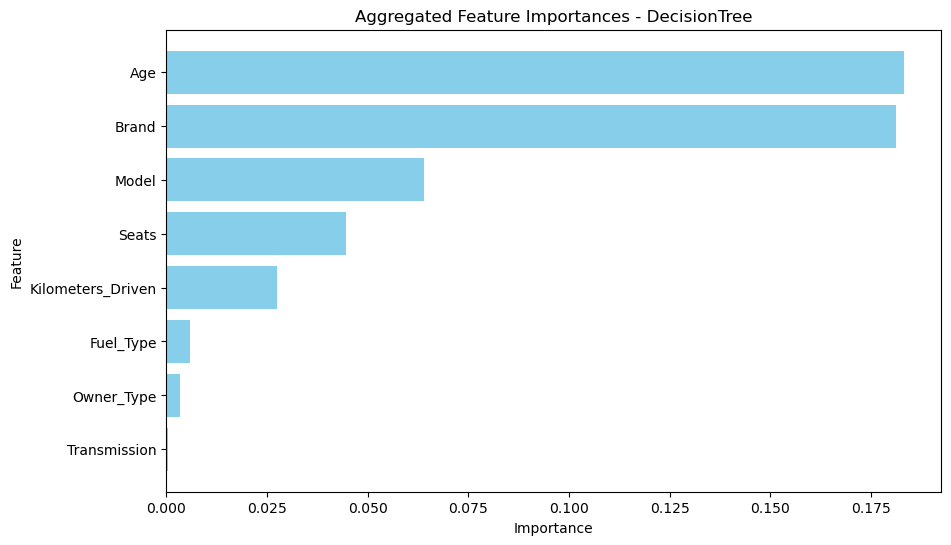

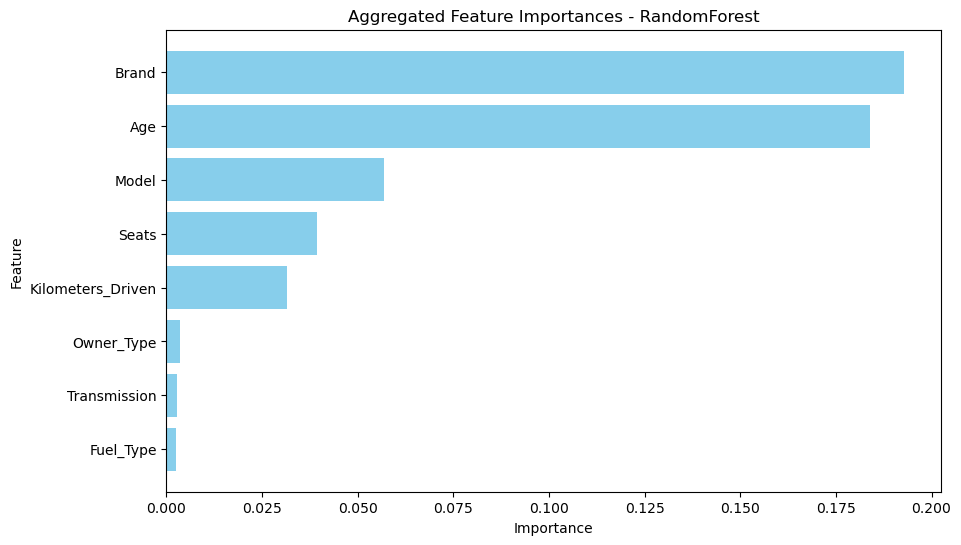

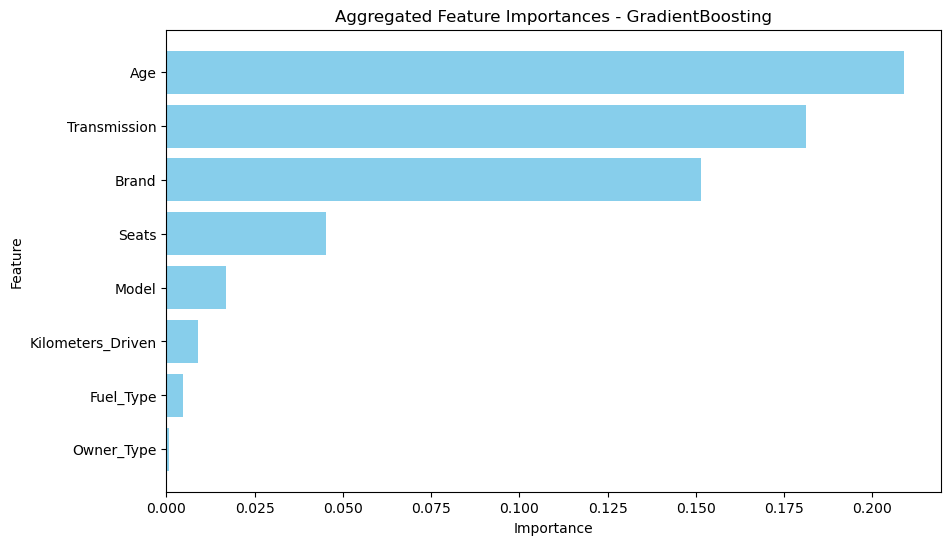

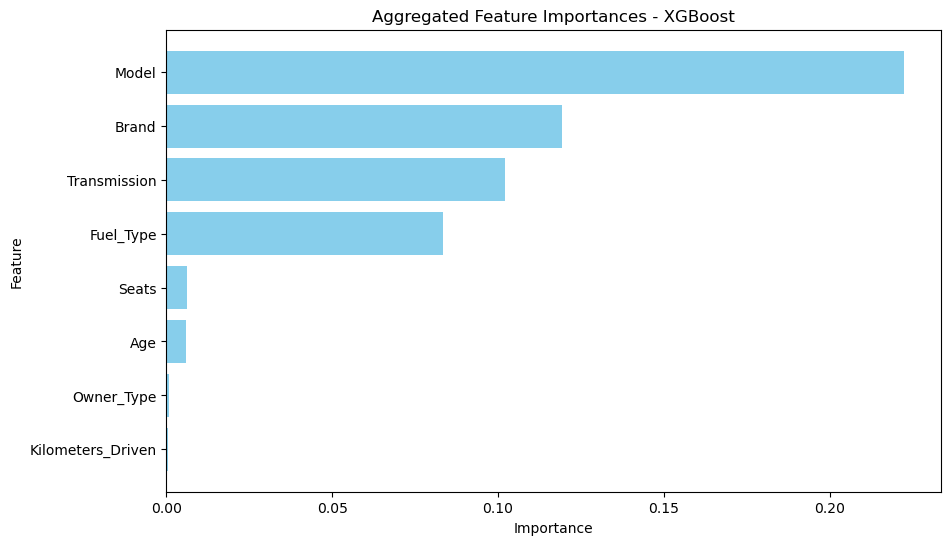

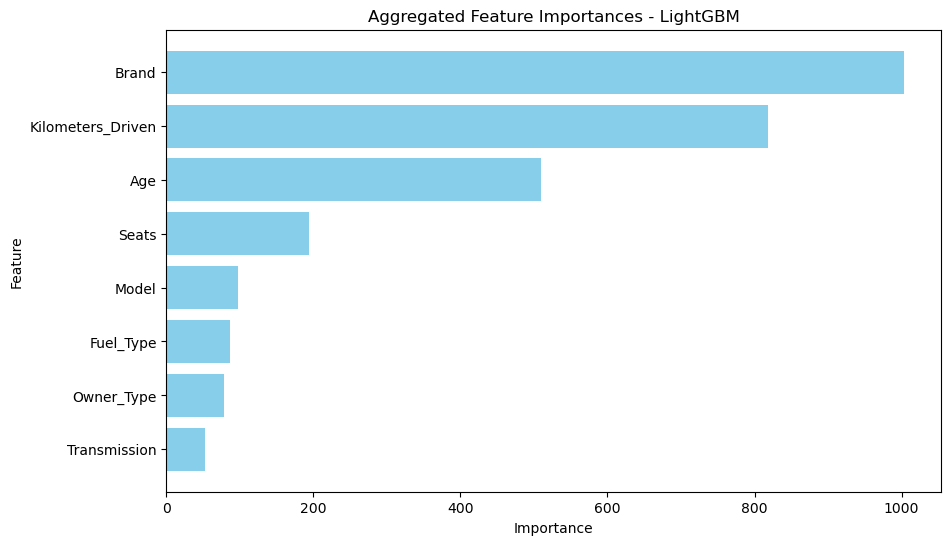

In [17]:
# 변수 중요도 시각화 함수
def aggregate_feature_importances(importances, feature_names, original_features):
    """
    원핫 인코딩된 피처의 중요도를 원래 피처 단위로 합산하여 반환합니다.
    
    :param importances: 모델의 feature_importances_
    :param feature_names: 원핫 인코딩된 전체 피처 이름 리스트
    :param original_features: 원래 피처 이름 리스트
    :return: 원래 피처 단위의 중요도 DataFrame
    """
    aggregated_importances = {}
    
    for feature in original_features:
        # 원핫 인코딩된 변수들을 해당 원래 변수로 묶어서 중요도를 합산
        relevant_importances = importances[np.char.startswith(feature_names, feature)]
        # 중요도의 합을 계산하여 저장
        aggregated_importances[feature] = np.sum(relevant_importances)
    
    return pd.DataFrame(list(aggregated_importances.items()), columns=['Feature', 'Importance'])

# 각 모델에 대한 변수 중요도 그래프 시각화 (원래 변수 기준)
for name, model in models.items():
    # 모델의 변수 중요도 추출
    importances = model.feature_importances_
    
    # 원래 변수 단위로 중요도 합산
    aggregated_importances_df = aggregate_feature_importances(importances, np.array(all_columns), features)
    aggregated_importances_df = aggregated_importances_df.sort_values(by='Importance', ascending=False)
    
    # 중요도 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(aggregated_importances_df['Feature'], aggregated_importances_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Aggregated Feature Importances - {name}')
    plt.gca().invert_yaxis()
    plt.show()

- 모델들의 변수 중요도 상위 변수는 유사하다. 
- 분석에서 Name(Brand, Model), Age, Kilometers_Driven, Transmission 등이 핵심적으로 영향을 끼쳤다는 것을 알 수 있다. 
- 특히, 설명력이 좋은 모델인 Random Forest와 XGBoost는 Name, Age, Transmission을 핵심 변수로 꼽고 있다. 

#### 4-2. 모델별 산점도 행렬 시각화 

In [18]:
# 중요한 피처 추출 
def get_important_features(model, feature_names, top_n=5):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[-top_n:]  # 상위 top_n개의 변수 선택
    important_features = feature_names[sorted_idx]
    return important_features

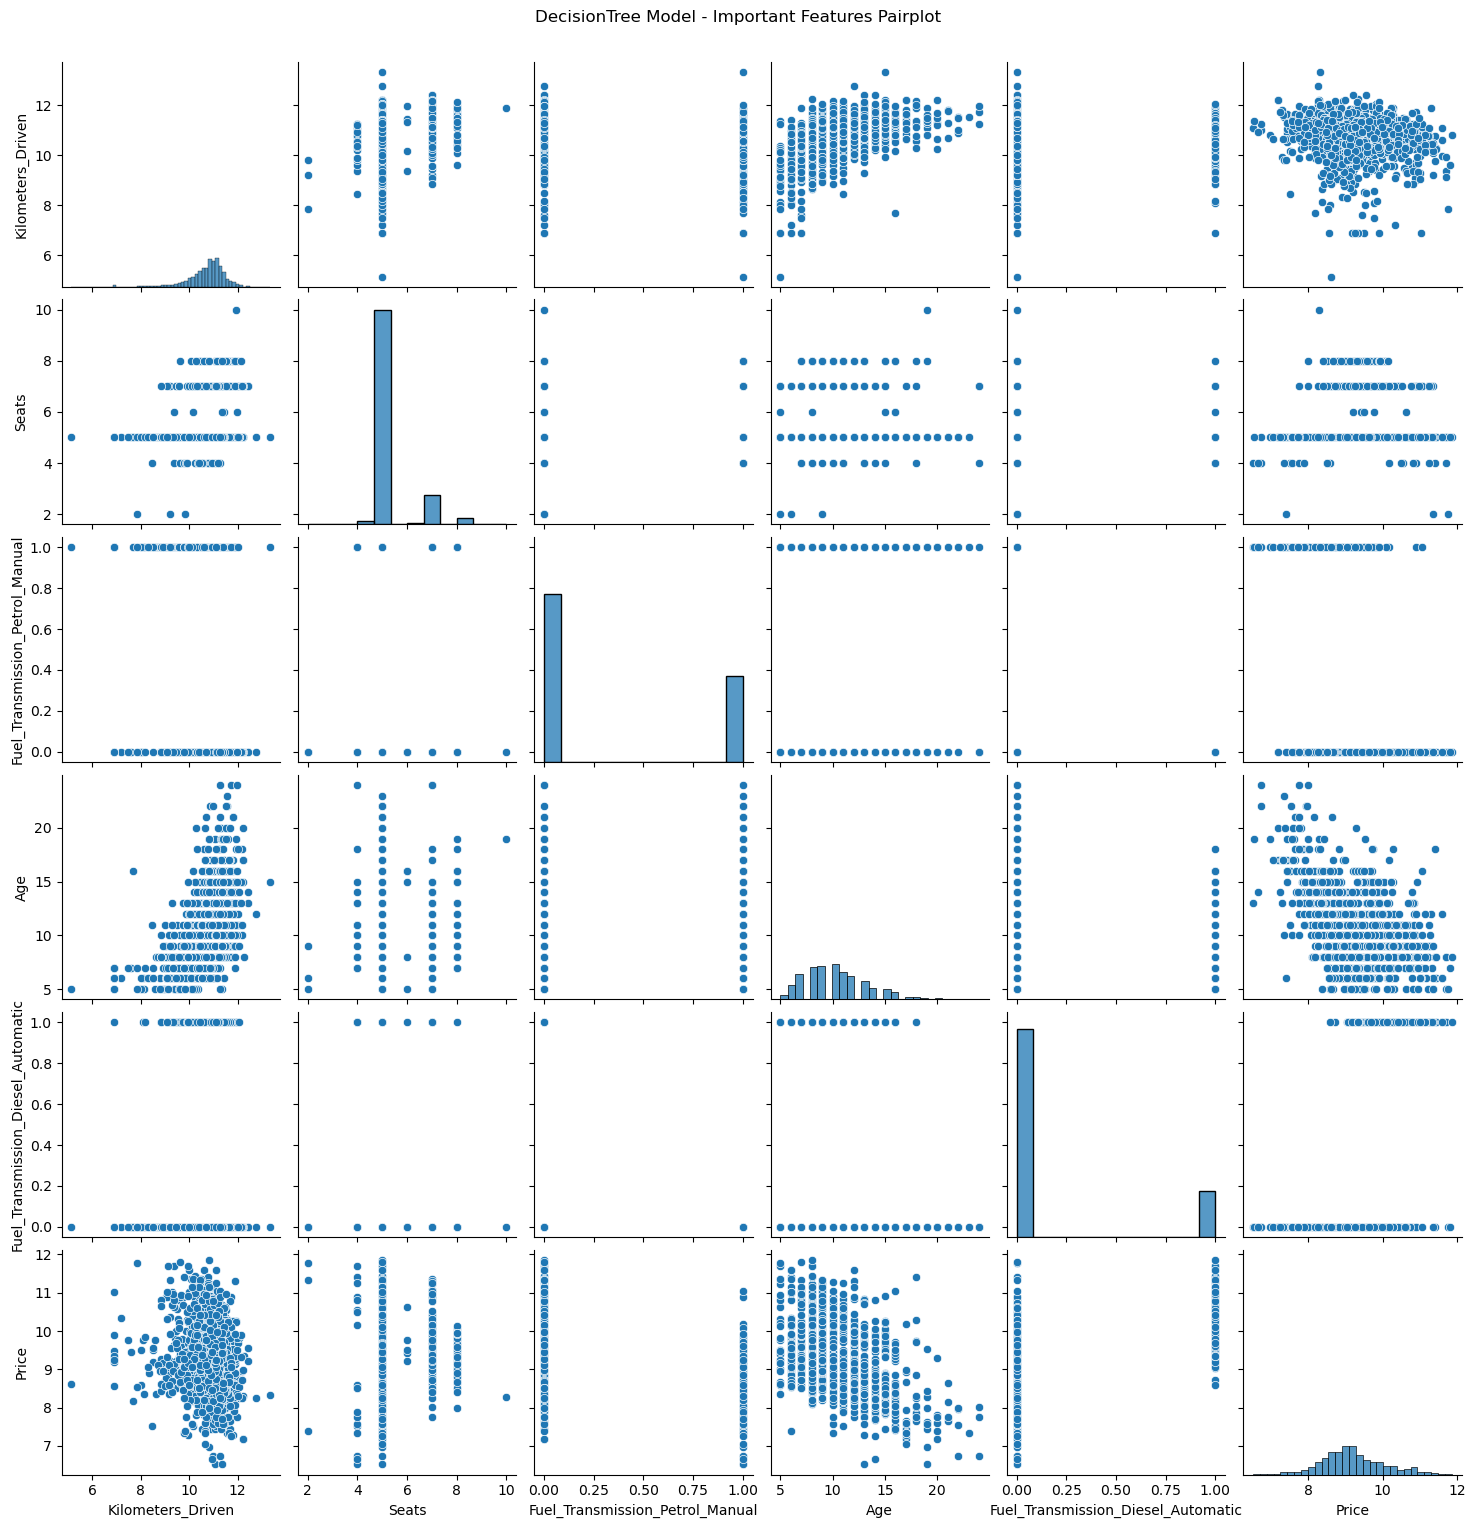

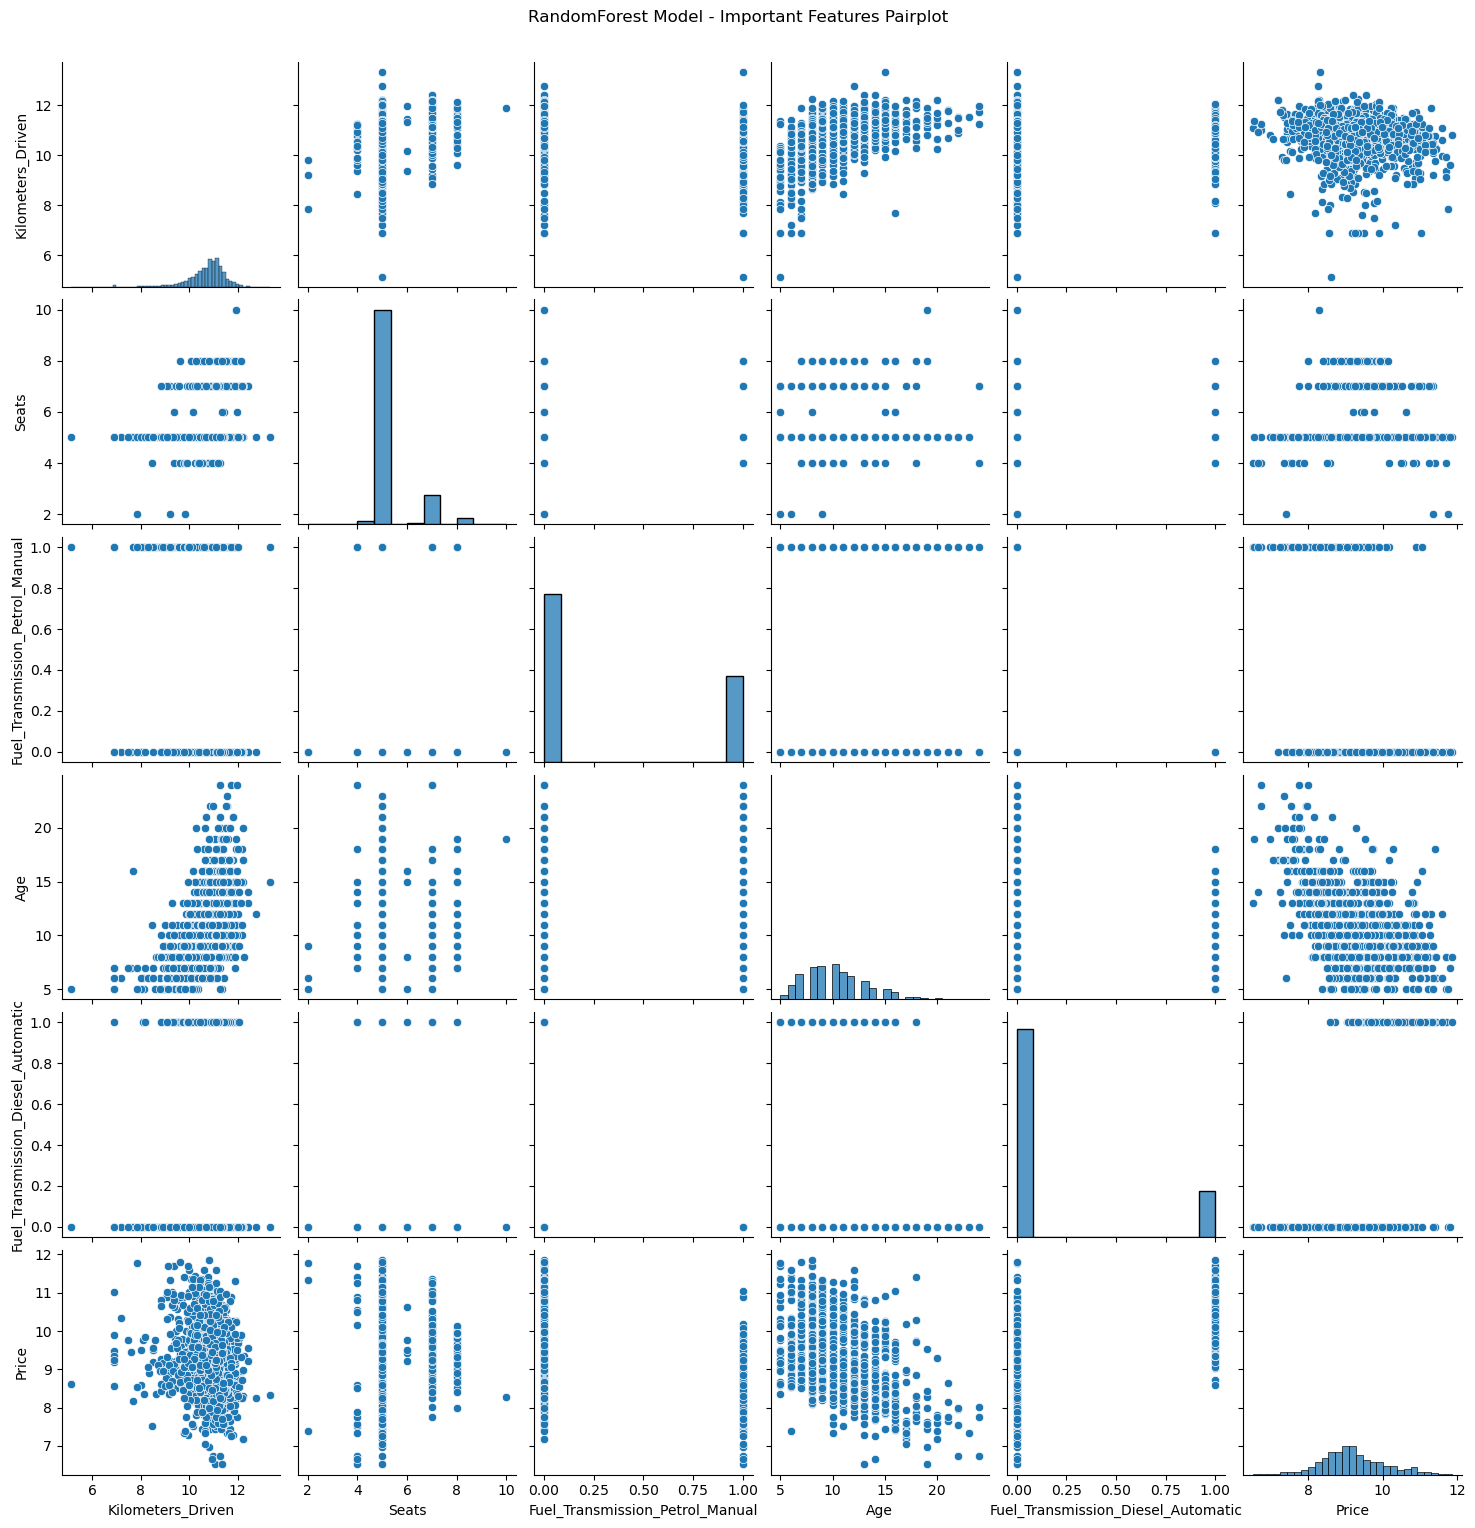

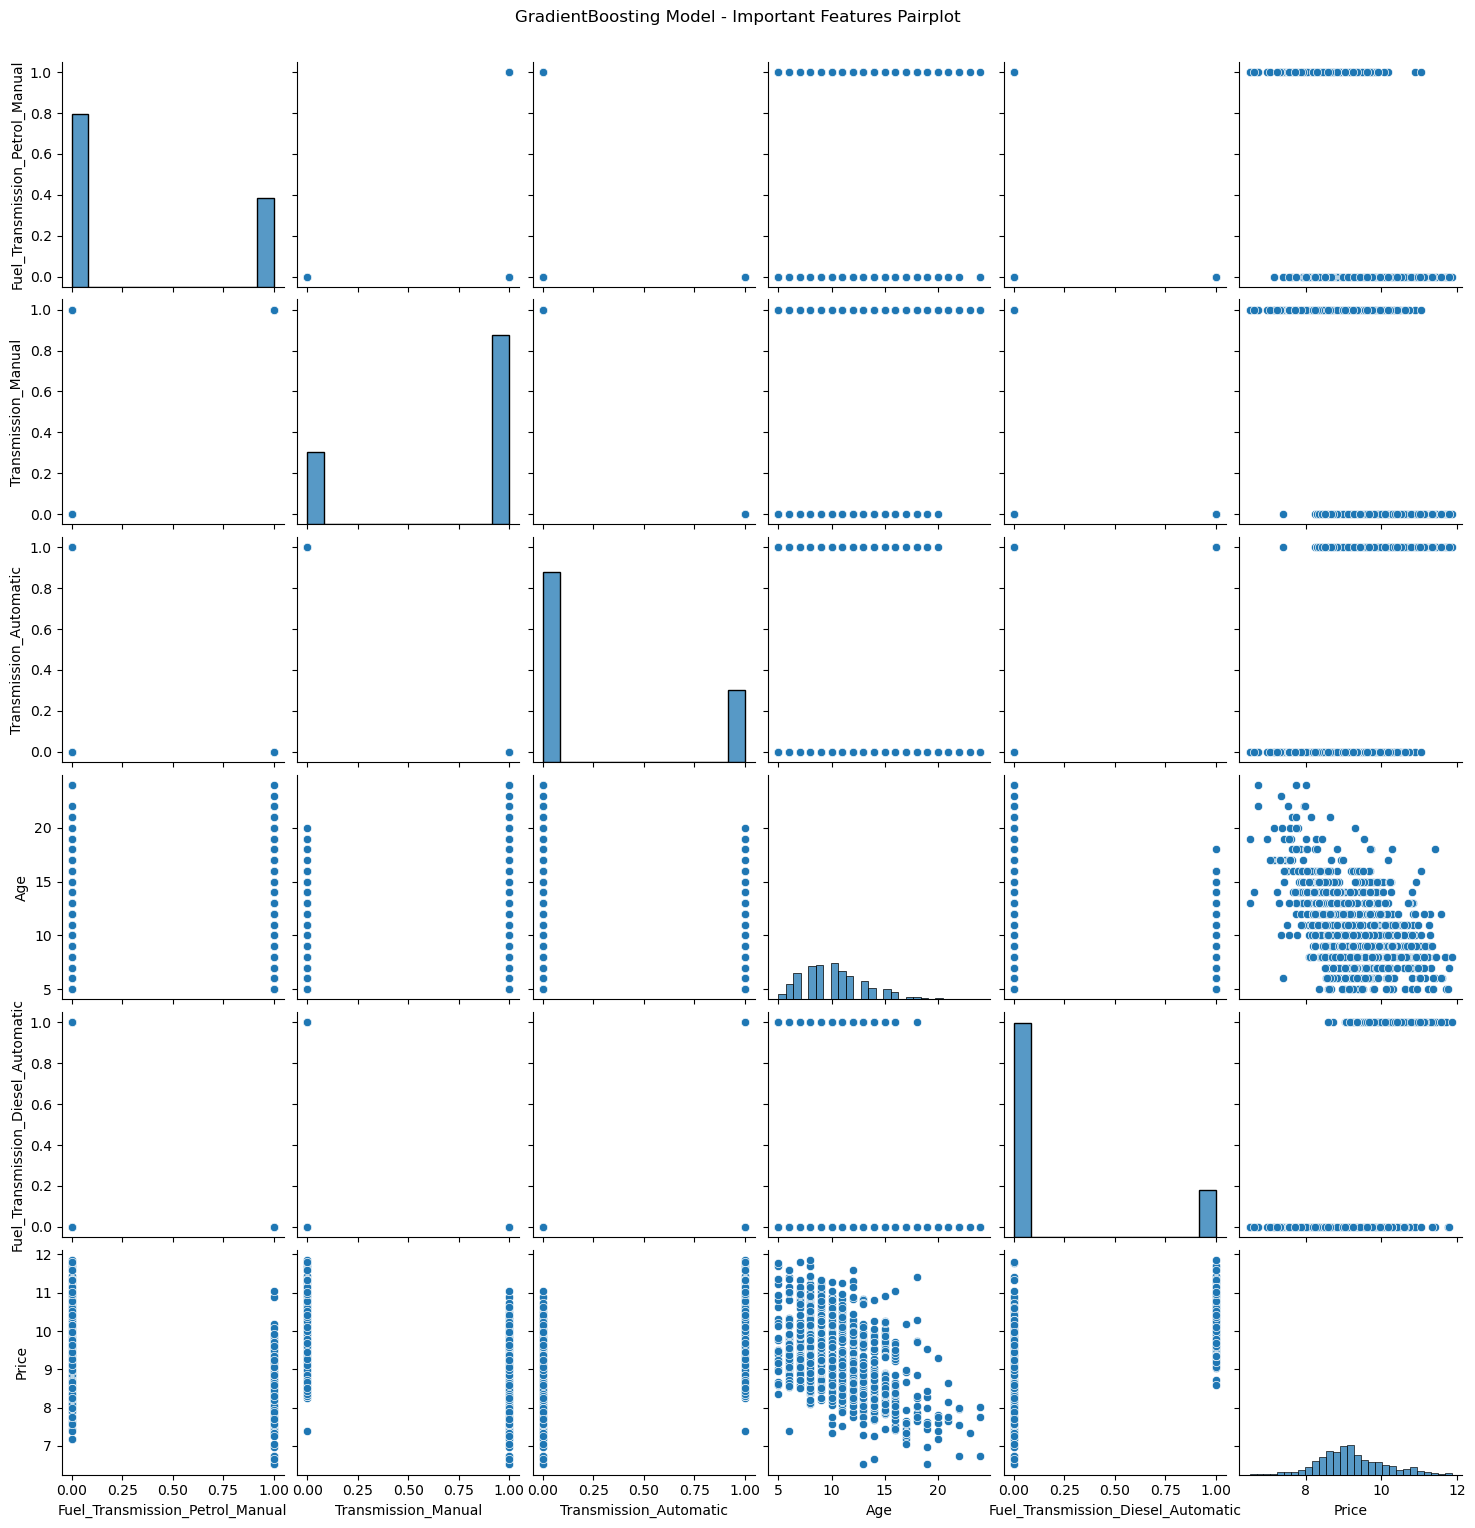

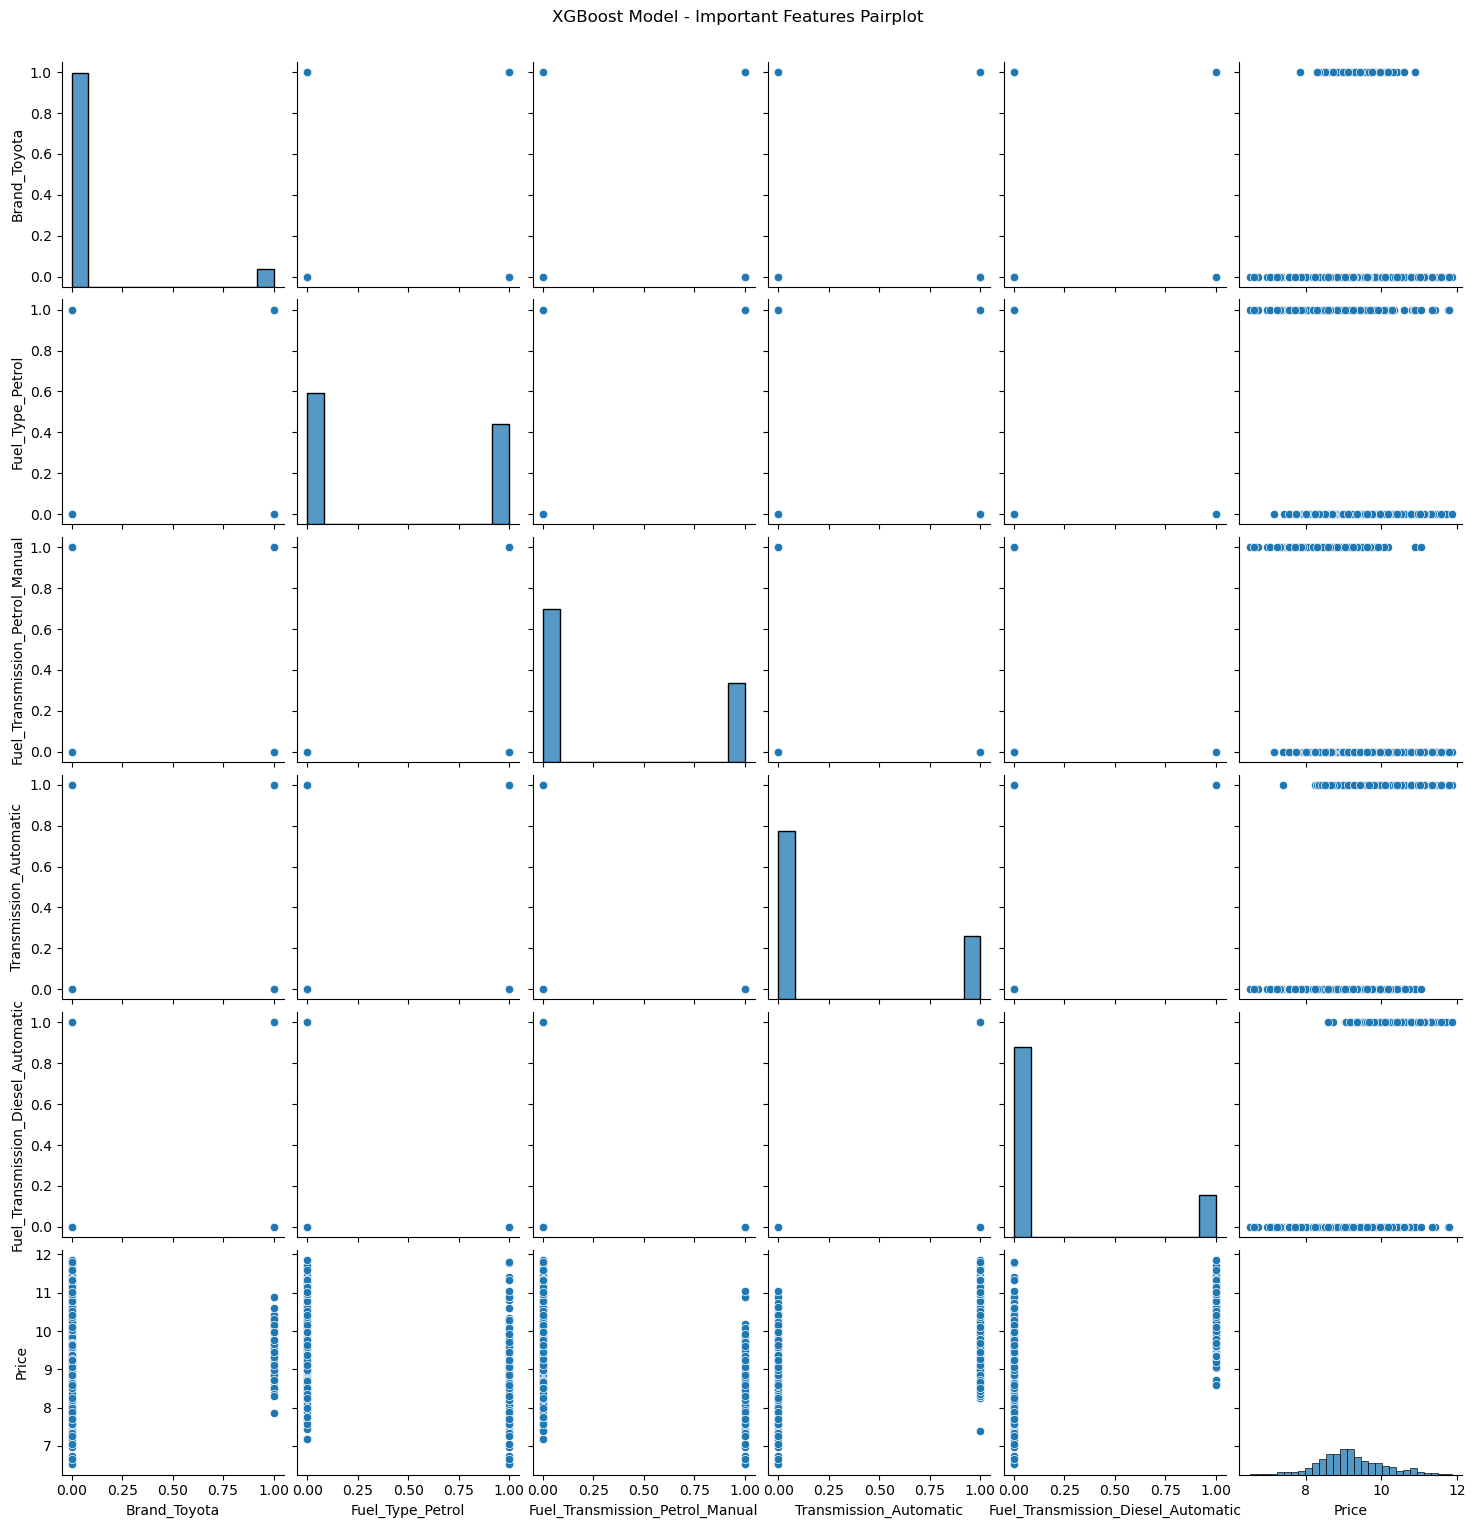

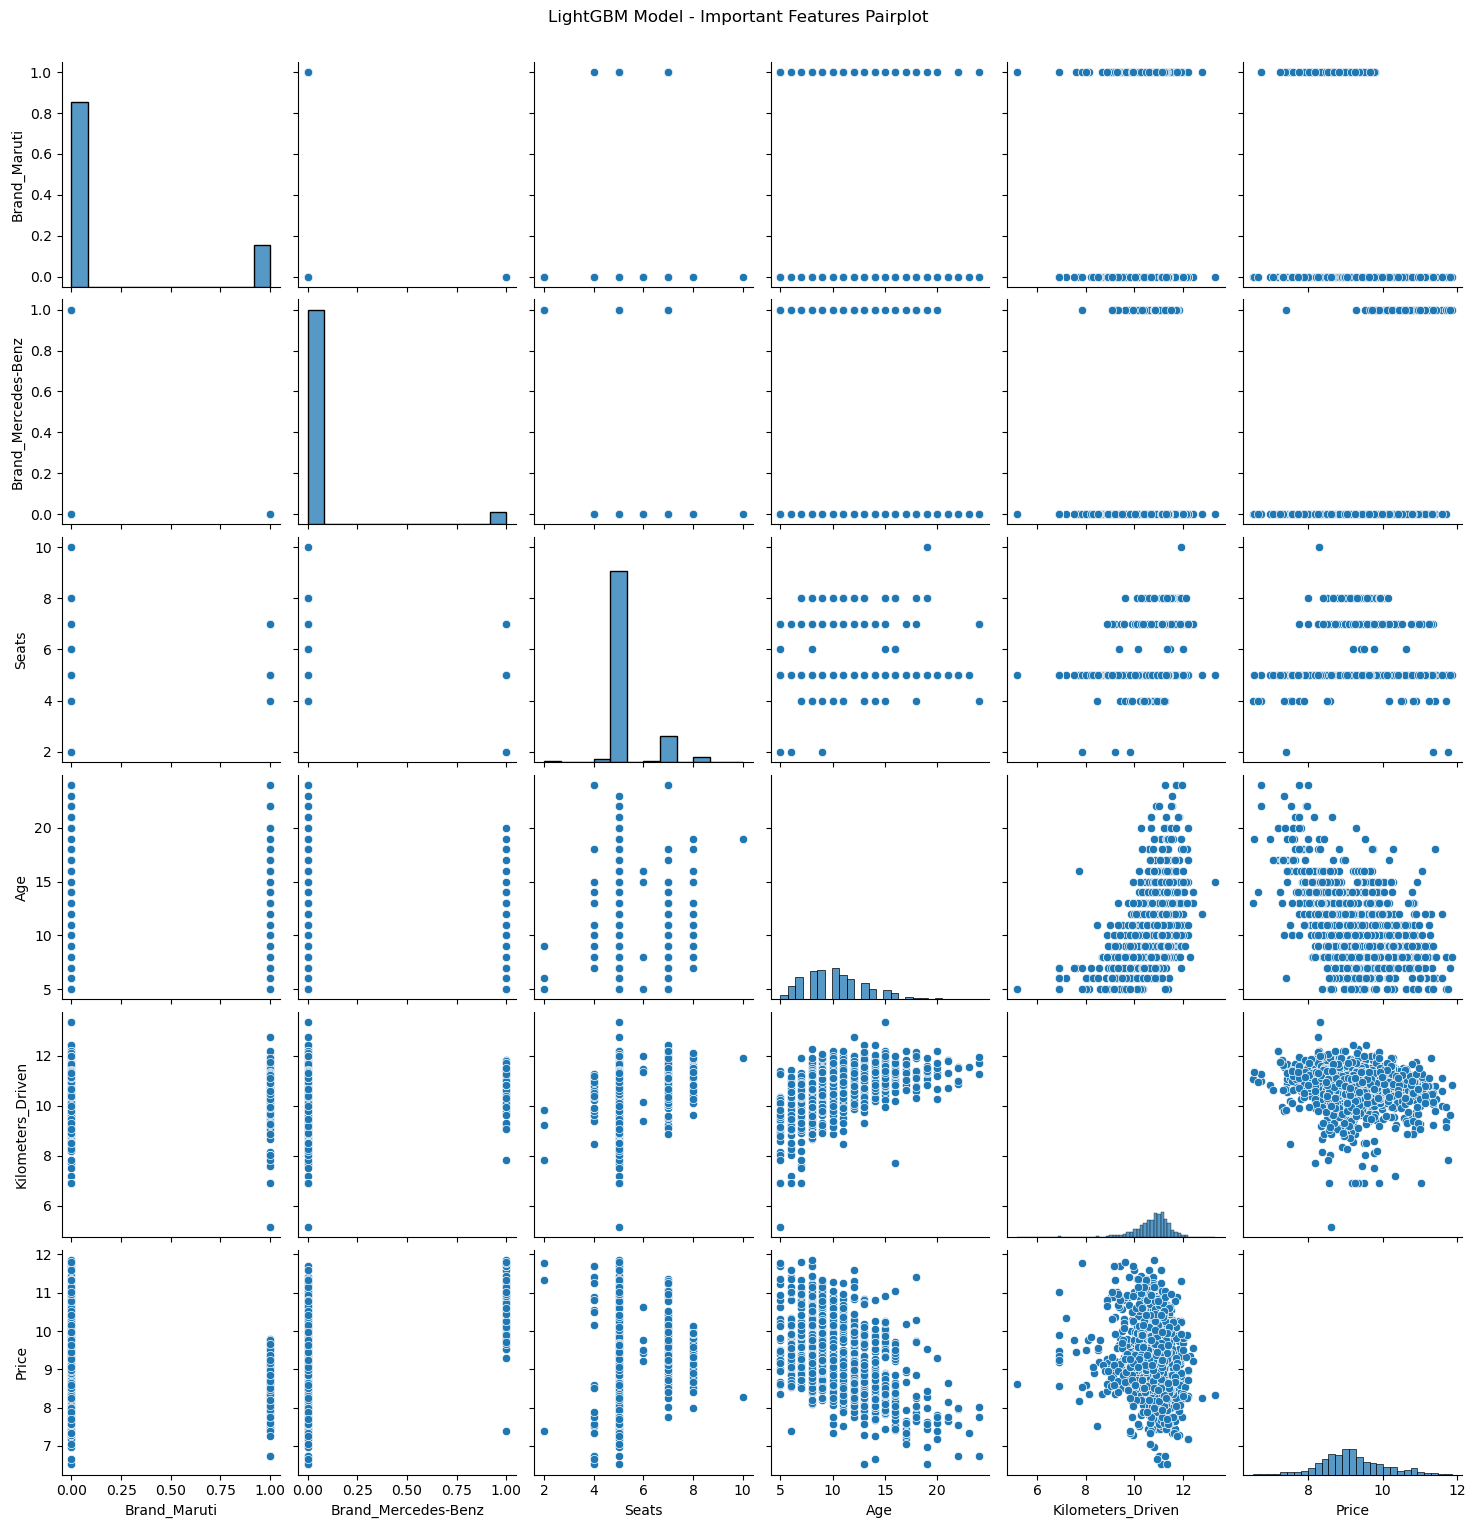

In [19]:
# 산점도 행렬 
for name, model in models.items():
    # 중요한 피처 추출
    important_features = get_important_features(model, np.array(all_columns))
    
    important_df = pd.DataFrame(df_X_test, columns=all_columns)[important_features]
    important_df['Price'] = df_y_test.values  # df_y_test가 Series라면 .values로 변환
    
    # 산점도 행렬 시각화
    sns.pairplot(important_df)
    plt.suptitle(f'{name} Model - Important Features Pairplot', y=1.02)
    plt.show()

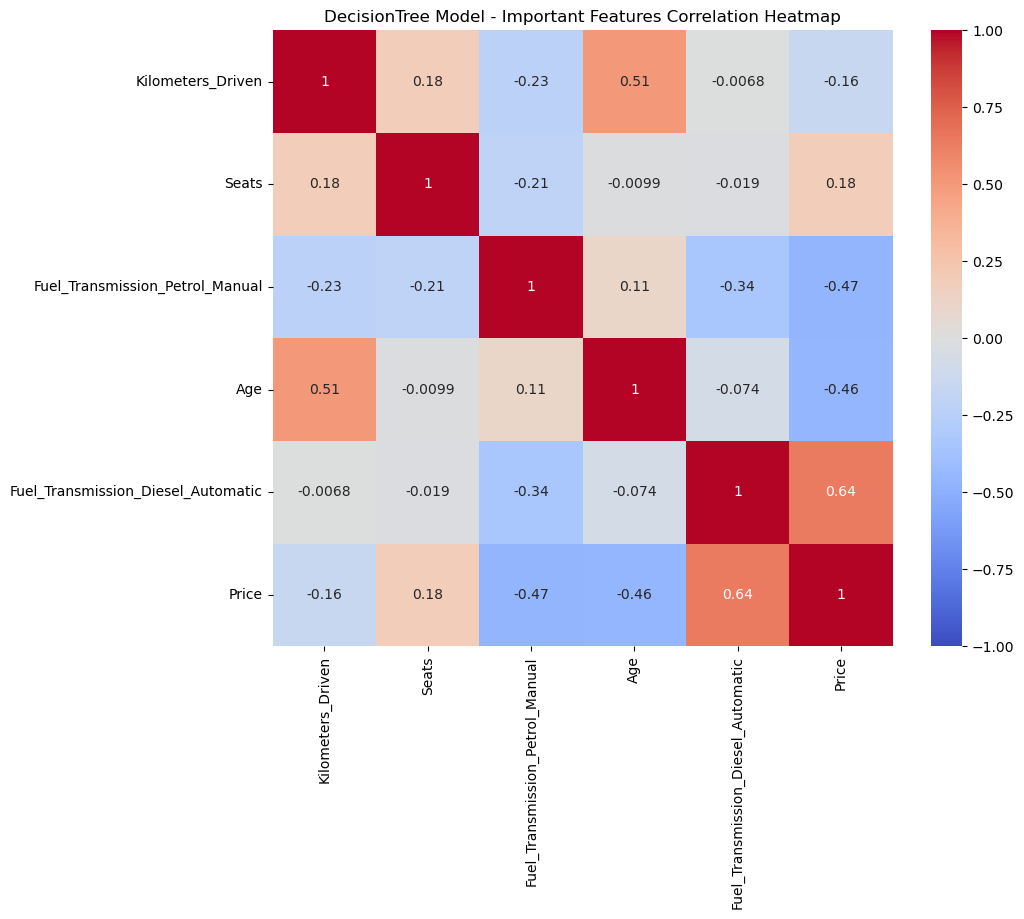

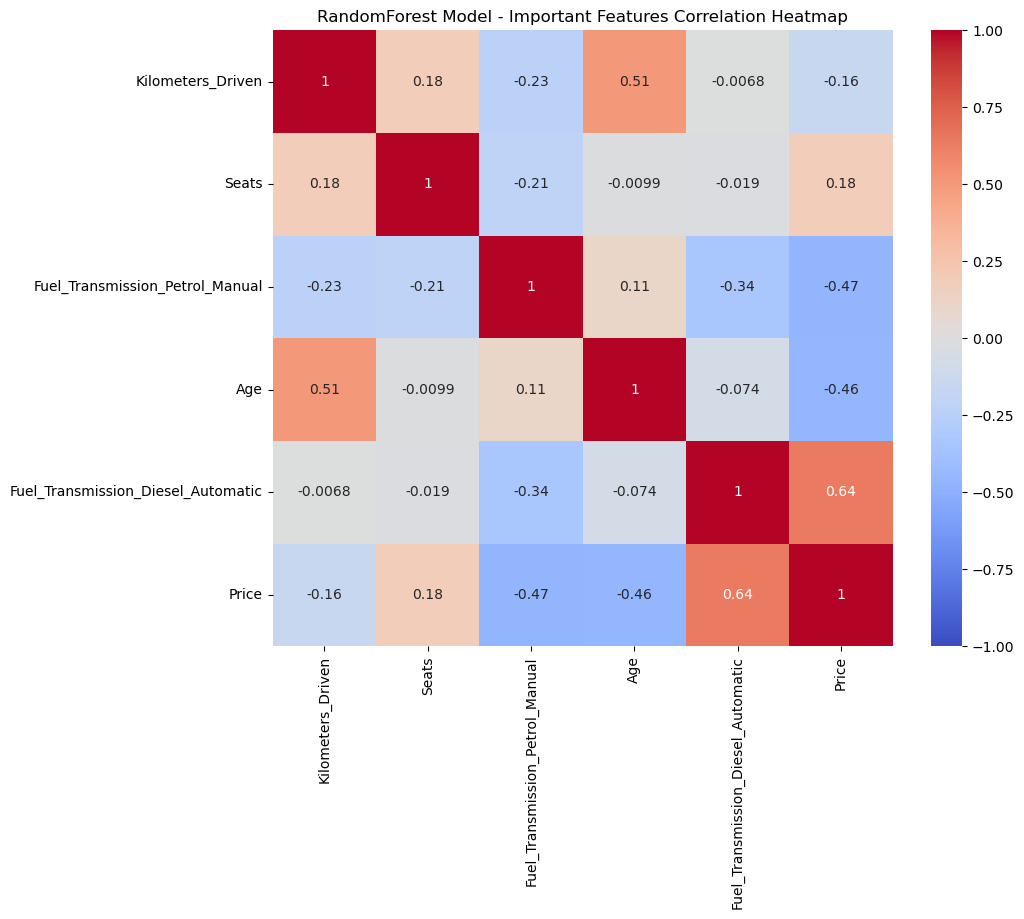

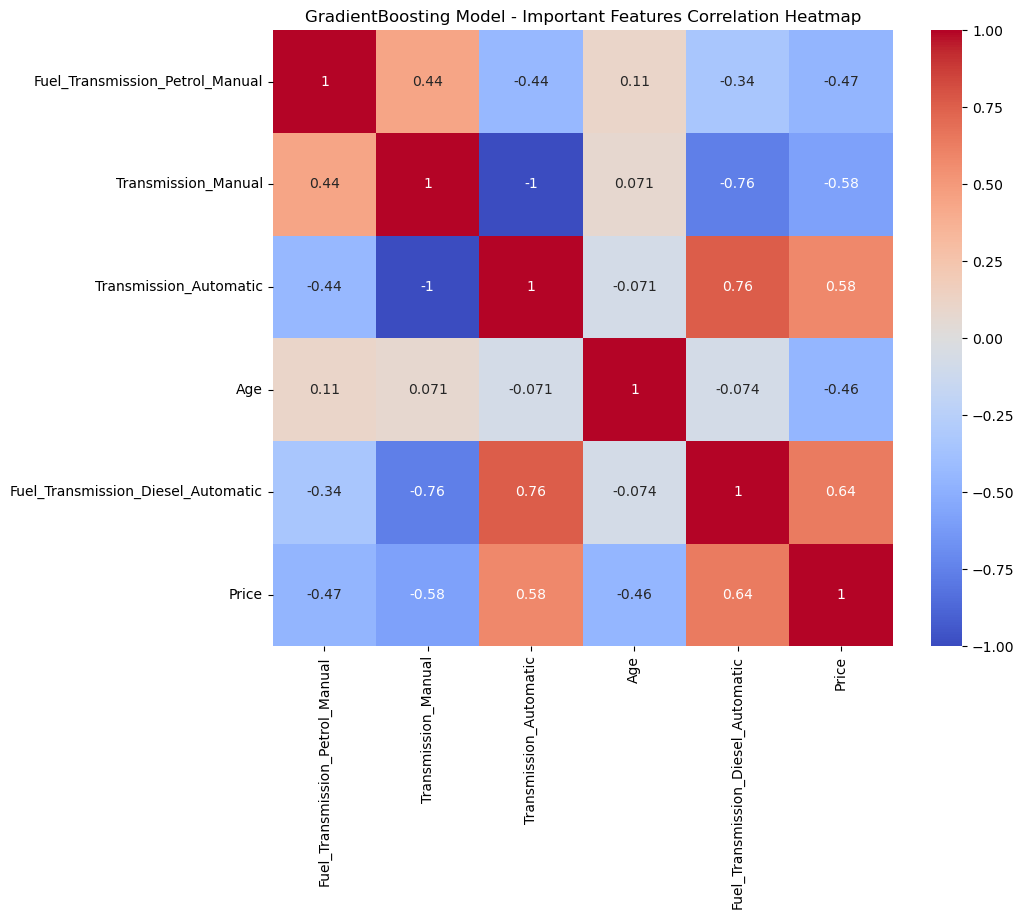

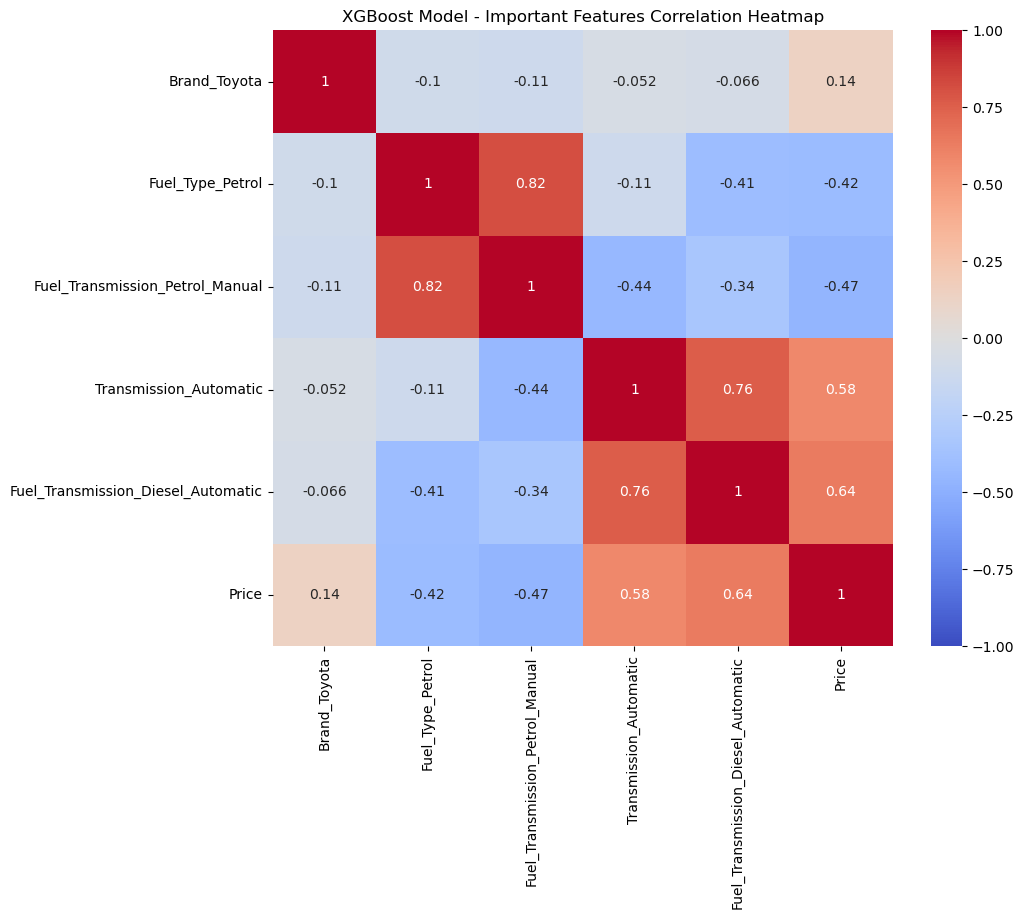

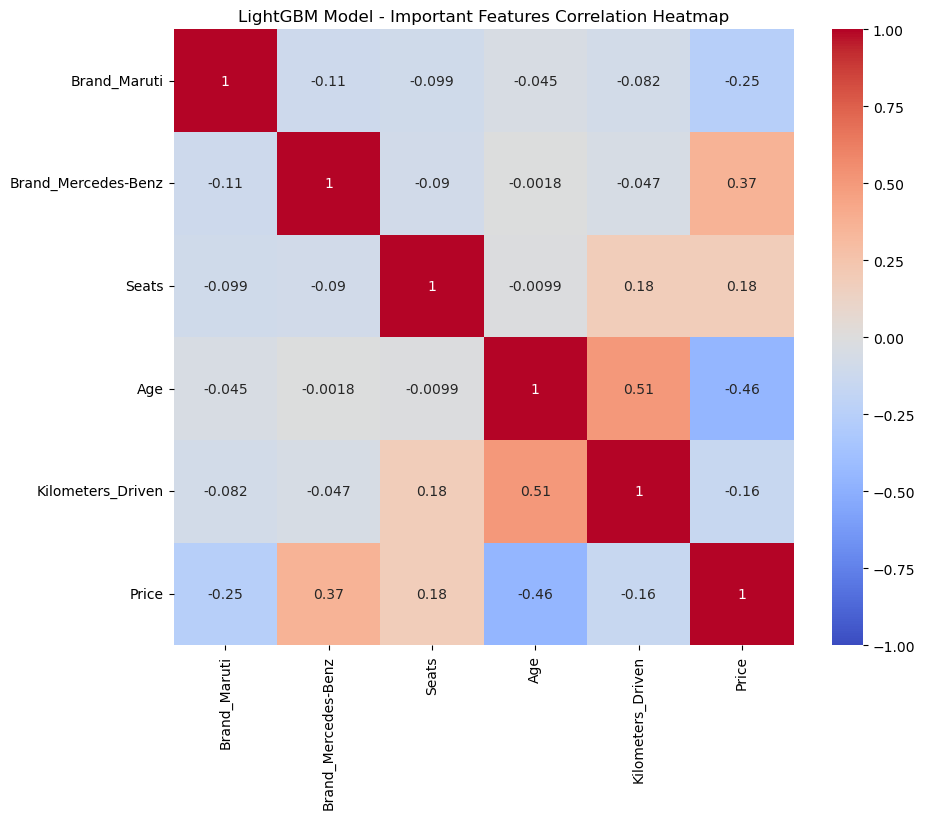

In [ ]:
# 상관관계 히트맵
for name, model in models.items():
    important_features = get_important_features(model, np.array(all_columns))
    
    important_df = pd.DataFrame(df_X_test, columns=all_columns)[important_features]
    important_df['Price'] = df_y_test.values
    
    # 상관관계 히트맵 시각화
    correlation_matrix = important_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{name} Model - Important Features Correlation Heatmap')
    plt.show()

### 5. 모델 검증 

#### 5-1. 검증 데이터 불러오기 (인도 중고차 사이트)

In [21]:
df_new = pd.read_csv('./ods_car.csv')
df_new.head()

,Price,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model
0,7071840,9,25000,petrol,automatic,1,5,Maruti,Suzuki Celerio ZXI AMT ABS
1,5598540,10,29000,petrol,manual,2,5,Hyundai,i10 magna 1.1
2,5647650,13,72000,petrol,manual,3,5,Maruti,Suzuki Swift ZXI
3,6138750,11,36000,petrol,manual,1,5,Hyundai,i10 Sportz(O) 1.2 Petrol
4,6089640,6,29000,petrol,automatic,3,5,Renault,Kwid CLIMBER 1.0 AMT


#### 5-2. 검증 데이터 전처리 - 기존 전처리 방식 동일 적용 

In [22]:
# 범주형 변수 인코딩 및 숫자형 변수 변환
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
numerical_features = ['Age', 'Kilometers_Driven', 'Seats']

# ColumnTransformer 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

In [23]:
df_new_X = df_new[features]
df_new_y = df_new['Price']

In [24]:
# 추가적인 전처리 
# (True/False로 적용 여부를 결정)
apply_log_transform = True
apply_fuel_transmission_interaction_terms = True
apply_brand_model_interaction = True
# apply_polynomial_features = False
# apply_standardization = False

# 로그 변환 적용 
# (Price, Kilometers_Driven)에 로그 변환 적용
if apply_log_transform:
    df_y = np.log1p(df_y)
    df_X['Kilometers_Driven'] = np.log1p(df_X['Kilometers_Driven'])
    print("apply log transform")

# 상호작용 변수 생성 
# (Fuel_Type, Transmission)에 대한 상호작용 변수 생성
if apply_fuel_transmission_interaction_terms:
    # 두 변수의 값을 문자열로 변환하고, 결합하여 새로운 변수 생성
    # (ex. Diesel_Manual, Petrol_Automatic)
    df_X['Fuel_Transmission'] = df_X['Fuel_Type'].astype(str) + '_' + df_X['Transmission'].astype(str)
    # 새로운 변수를 범주형 변수로 추가 
    # (기존의 Fuel_Type, Transmission 변수는 제거)
    categorical_features.append('Fuel_Transmission')
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
            ('num', 'passthrough', numerical_features)])
    print("apply fuel_type + transmission interaction terms")

# (Brand, Model)에 대한 상호작용 변수 생성
if apply_brand_model_interaction:
    df_X['Brand_Model'] = df_X['Brand'].astype(str) + '_' + df_X['Model'].astype(str)
    categorical_features.append('Brand_Model')
    print("apply brand + model interaction terms")

# # 5. 다항식 피처 생성 (실제 적용 X)
# # (모든 수치형 변수)에 대한 2차 다항식 피처 생성
# if apply_polynomial_features:
#     poly_features = PolynomialFeatures(degree=2, include_bias=False)
#     preprocessor = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('poly', poly_features)
#     ])
#     print("apply polynomial features")

# # 6. 표준화 적용 (실제 적용 X)
# # (모든 수치형 변수)에 대한 표준화 적용
# 선형회귀를 제외한 나머지 회귀 모델은 표준화를 적용하지 않음 
# if apply_standardization:
#     preprocessor = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('scaler', StandardScaler(with_mean=False))
#     ])
#     print("apply standardization")

apply log transform
apply fuel_type + transmission interaction terms
apply brand + model interaction terms
apply standardization


In [26]:
# 카테고리 피처가 문자열인지 확인하고 변환
for col in categorical_features:
    df_new_X[col] = df_new_X[col].astype(str)

# NaN 값을 처리 (예: 'missing'으로 대체)
df_new_X[categorical_features] = df_new_X[categorical_features].fillna('missing')

# Preprocessor 적용 
preprocessor = joblib.load('preprocessor.pkl')
df_new_X = preprocessor.transform(df_new_X)

#### 5-3. 검증 데이터 모델 평가 

### DecisionTree Model Evaluation ###
MSE: 53.3589
RMSE: 7.3047
MAE: 7.2831
R^2: -178.0954


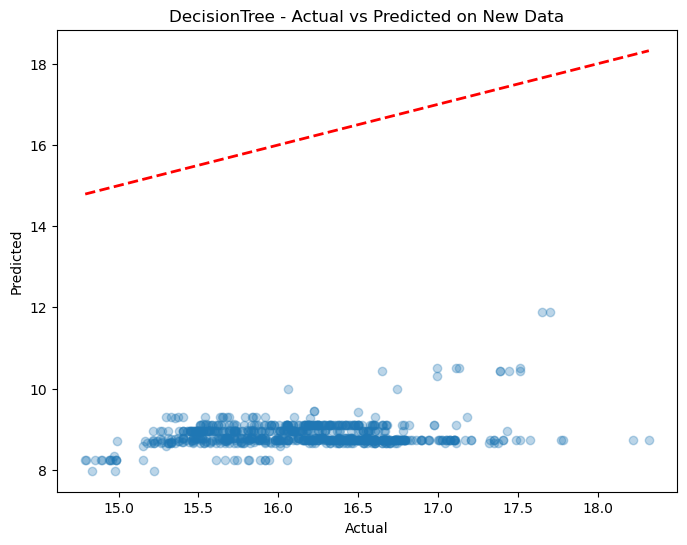

### RandomForest Model Evaluation ###
MSE: 50.0529
RMSE: 7.0748
MAE: 7.0606
R^2: -166.9992


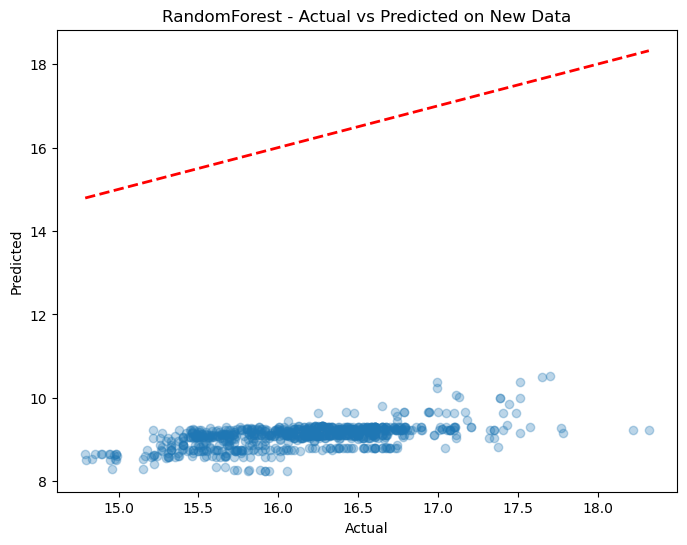

### GradientBoosting Model Evaluation ###
MSE: 46.8895
RMSE: 6.8476
MAE: 6.8353
R^2: -156.3812


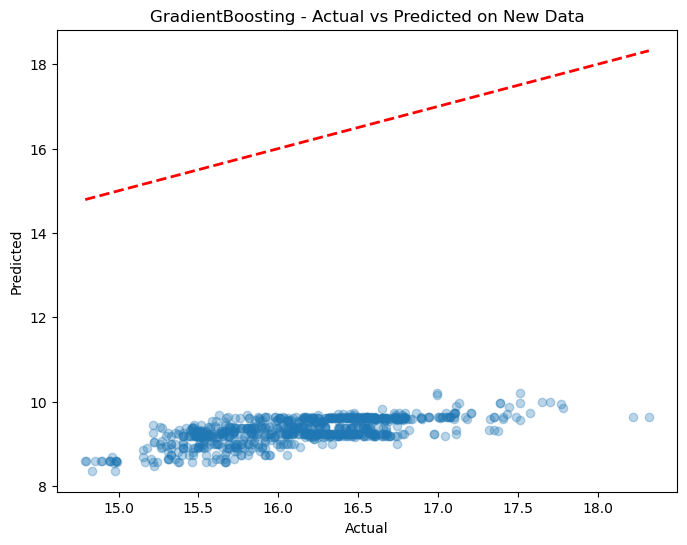

### XGBoost Model Evaluation ###
MSE: 50.8895
RMSE: 7.1337
MAE: 7.1218
R^2: -169.8071


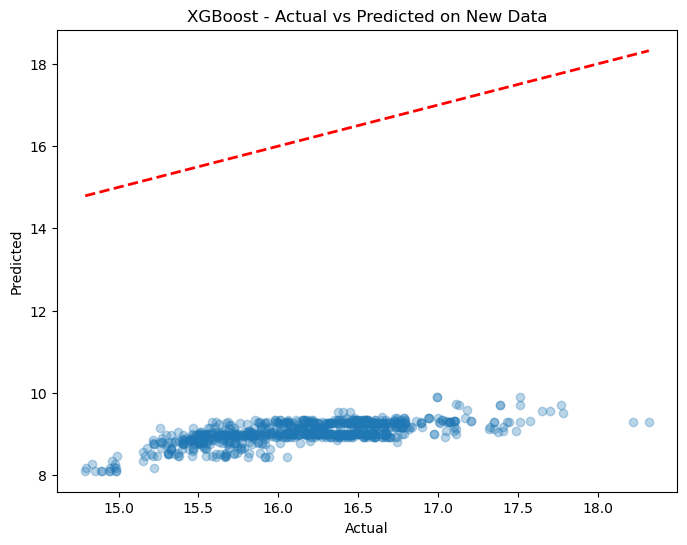

### LightGBM Model Evaluation ###
MSE: 52.3398
RMSE: 7.2346
MAE: 7.2225
R^2: -174.6748


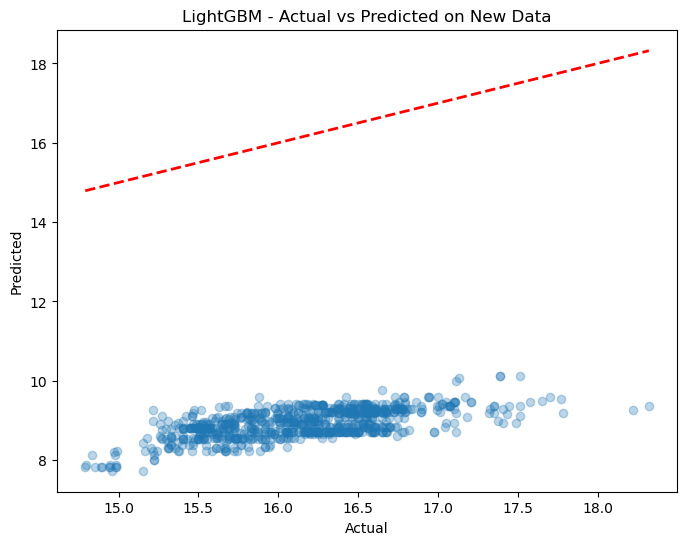

In [27]:
model_names = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBoost', 'LightGBM']  

def evaluate_model(name, model, X_test, y_test):
    # 테스트 데이터에 대한 예측 수행
    y_pred = model.predict(X_test)
    
    # 성능 지표 계산
    mse = mean_squared_error(y_test, y_pred) # MSE: 평균 제곱 오차
    rmse = np.sqrt(mse) # RMSE: 평균 제곱근 오차
    mae = mean_absolute_error(y_test, y_pred) # MAE: 평균 절대 오차
    r2 = r2_score(y_test, y_pred) # R^2: 결정 계수

    # 평가 결과 출력
    print(f'### {name} Model Evaluation ###')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R^2: {r2:.4f}')
    
    # 예측 결과 시각화
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs Predicted on New Data')
    plt.show()

# 모델별 평가 실행
for model_name in model_names:
    # 저장된 모델 불러오기
    loaded_model = joblib.load(f'{model_name}_model.pkl')
    # 모델 평가
    evaluate_model(model_name, loaded_model,df_new_X, df_new_y)

- 그래프에서 볼 수 있듯이, 대부분의 점들이 y=x 선에서 상당히 멀리 떨어져 있으며, 특히 예측 값이 실제 값보다 크게 분포되어 있다. 
- 예측 값들이 실제 값보다 많이 낮게 나오고 있으며, 실제 값이 증가해도 예측 값이 상대적으로 일정한 수준에 머물러 있는 패턴이 보인다. 이는 모델이 데이터의 복잡성을 잘 학습하지 못하고, 실제 값의 변동성을 포착하지 못하는 경우에 나타날 수 있다. 
- 학습과 평가를 진행한 데이터와 검증용으로 사용한 실제 데이터에 큰 차이가 있다는 것을 알 수 있다. 
- 이러한 경우에는 모델의 복잡성을 높이거나, 데이터의 특성을 더 잘 반영할 수 있는 피처 엔지니어링을 통해 모델의 성능을 개선할 수 있다.
- R^2(결정계수)
    - Random Forest: -166.9992
    - XGBoost: -169.8071
    - Gradient Boosting: -156.3812
    - Decision Tree: -178.0954
    - LightBGM: -174.6748
    - Random Forest와 XGBoost가 상대적으로 높은 결정계수(설명력)을 띤다. 